# Propensity Score Exercise Starter

In [1]:
import pandas as pd
import yaml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

First we read the dataset and calculate the proportion of deaths in each
group

In [2]:
rhc = pd.read_csv("materials/rhc_dataset.csv")
with open("materials/confounders.yml", "r") as f:
    confounders = yaml.safe_load(f)

rhc["swang1"] = (rhc["swang1"] == "RHC").astype(int)
rhc["death"] = (rhc["death"] == "Yes").astype(int)
rhc.groupby("swang1")["death"].mean()

swang1
0    0.629682
1    0.680403
Name: death, dtype: float64

Let’s calculate the propensity score using logistic regression, and
evaluate its accuracy using the AUC (observe that in this case we
haven’t used cross-fitting).

In [3]:
X = rhc[confounders]
X = pd.get_dummies(X)
y = rhc["swang1"]
ps_model = LogisticRegression(penalty="none")
ps_model.fit(X, y)
rhc["ps_scores"] = ps_model.predict_proba(X)[:, 1]

/Users/aleix/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aleix/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

With the predicted propensity scores, we can plot their distribution for
both groups to visual assess the positivity assumption

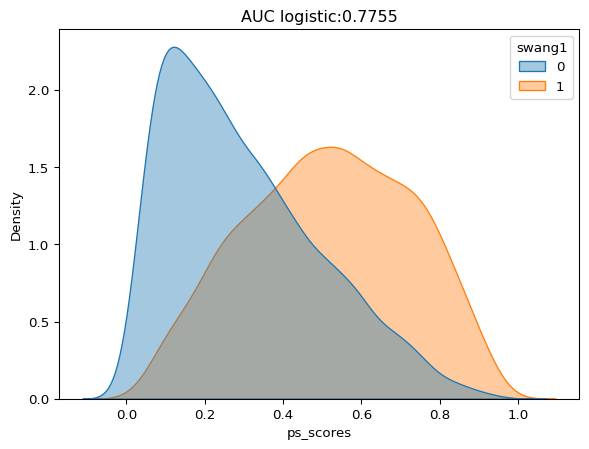

In [4]:
auc = round(roc_auc_score(rhc["swang1"], rhc["ps_scores"]), 4)
sns.kdeplot(
    data=rhc, x="ps_scores", hue="swang1", fill=True, common_norm=False, alpha=0.4
).set_title(f"AUC logistic:{auc}")
plt.show()

In this dataset there is a clear overlap between treatment and control
groups, so, if we used logistic regression for calculating the
propensity scores, we would conclude that the positivity assumption
holds for every patient.

Now it’s your turn, and you can follow the steps provided in the book.
The main objective is to elaborate more the calculation of propensity
scores using machine learning models (boosting) and also calculate the
ATE. Good luck!